In [1]:
import yastn
import yastn.tn.mps as mps
import matplotlib.pyplot as plt
import numpy as np
from operators import HXXZ, sumLn2, Ln, momentum_total, momentum_n, measure_energy_per_site

In [2]:
ops = yastn.operators.Spin12(sym='U1')  # "U1" enforces sum(Sz) conservation

L0 = 0.0
v = Q = 1.0

Now take N=160, and focus on dynamics

In [4]:
N, a = 100, 0.50
g = 1 / 5
m = g / 8
e0 = a * g * g / 2
t = 0
H0 = HXXZ(N, a, m, ops=ops)
H1 = e0 * sumLn2(N, t, L0, a, v, Q, ops=ops)

D = 32
charge = 0 # this is a total Sz-spin for U1 symmetry
psi_gs = mps.random_mps(H0, D_total=D, n=charge)
# 2 sweeps of 2-site dmrg
mps.dmrg_(psi_gs, [H0, H1], max_sweeps=2, energy_tol=1e-10, method='2site', opts_svd={"D_total": D})
# followed by 1-site sweeeps
info = mps.dmrg_(psi_gs, [H0, H1], max_sweeps=100, energy_tol=1e-12, method='1site')
print(info)
engs_gs = measure_energy_per_site(psi_gs, a, g, m, t, L0, v, Q, ops)

DMRG_out(sweeps=26, energy=-61.766111681715266, denergy=8.526512829121202e-13, max_dSchmidt=None, max_discarded_weight=None)


In [7]:
mops = [momentum_n(n, N, ops) for n in range(1, N-1)]

engs_time = []
mops_time = []
ents_time = []

times=np.linspace(0, a * N / 2, 51)

psi = psi_gs.copy()
Ht = lambda t: [H0, e0 * sumLn2(N, t, L0, a, v, Q, ops=ops)]
for step in mps.tdvp_(psi, Ht, times, dt=0.125, method='1site'):
    print(step)
    engs_time.append(measure_energy_per_site(psi, a, g, m, step.tf, L0, v, Q, ops))
    mops_time.append([mps.vdot(psi, op, psi) for op in mops])
    ents_time.append(psi.get_entropy())


TDVP_out(ti=0.0, tf=0.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=0.5, tf=1.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=1.0, tf=1.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=1.5, tf=2.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=2.0, tf=2.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=2.5, tf=3.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=3.0, tf=3.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=3.5, tf=4.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=4.0, tf=4.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=4.5, tf=5.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=5.0, tf=5.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=5.5, tf=6.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=6.0, tf=6.5, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=6.5, tf=7.0, time_independent=False, dt=0.125, steps=4)
TDVP_out(ti=7.0, tf=7.5, time_independent=False,

Text(0.5, 1.0, 'energy; g=0.2 m=0.025 a=0.5 N=100')

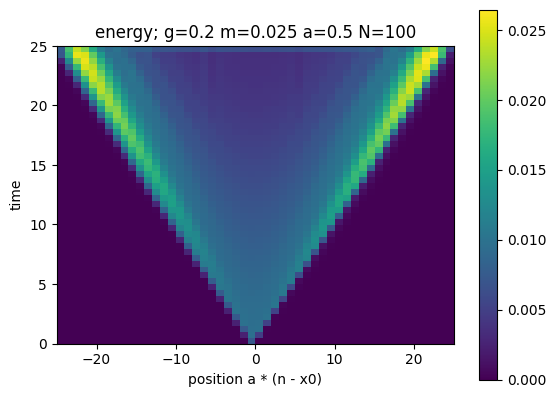

In [21]:
ee = np.array(engs_time) - engs_gs
ee = (ee[:, 0::2] + ee[:, 1::2]) / 2
fig = plt.imshow(ee, extent=(-N*a/2, N*a/2, times[0], times[-1]), origin='lower', aspect=1.5)
plt.colorbar()
plt.xlabel("position a * (n - x0)")
plt.ylabel("time")
plt.title(f"energy; {g=} {m=} {a=} {N=}")

Text(0.5, 1.0, 'momentum; g=0.2 m=0.025 a=0.5 N=100')

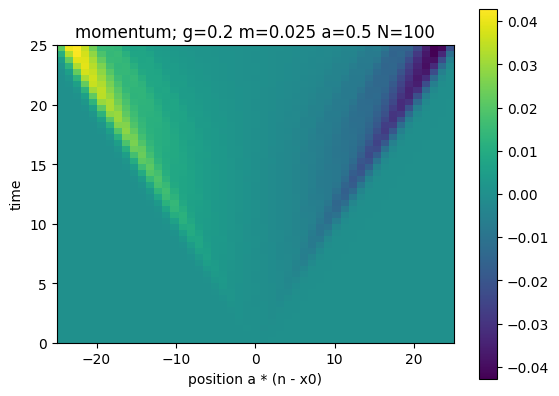

In [23]:
ee = np.array(mops_time).real
ee = (ee[:, 0::2] + ee[:, 1::2]) / 2
fig = plt.imshow(ee, extent=(-N*a/2, N*a/2, times[0], times[-1]), origin='lower', aspect=1.5)
plt.colorbar()
plt.xlabel("position a * (n - x0)")
plt.ylabel("time")
plt.title(f"momentum; {g=} {m=} {a=} {N=}")



Text(0.5, 1.0, 'entropy; g=0.2 m=0.025 a=0.5 N=100')

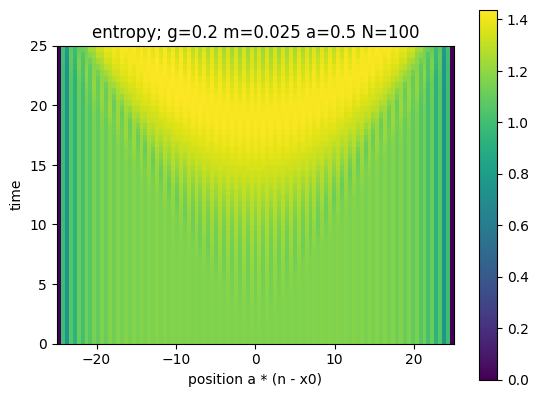

In [26]:
ee = np.array(ents_time).real
fig = plt.imshow(ee, extent=(-N*a/2, N*a/2, times[0], times[-1]), origin='lower', aspect=1.5)
plt.colorbar()
plt.xlabel("position a * (n - x0)")
plt.ylabel("time")
plt.title(f"entropy; {g=} {m=} {a=} {N=}")



Text(0, 0.5, 'total energy')

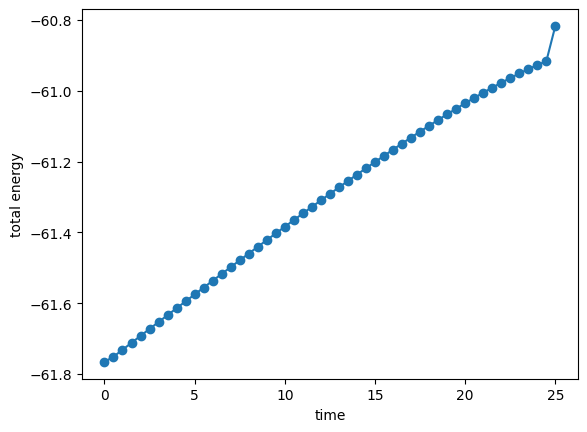

In [28]:
engs_total = [sum(engs_gs)] + [sum(ee) for ee in engs_time]
plt.plot(times, engs_total, '-o')
plt.xlabel("time")
plt.ylabel("total energy")